<a href="https://colab.research.google.com/github/IvanPP1018/SIMULACION-1/blob/main/Metodo_transformada_inversa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Parte Analítica del Problema

### Función de Densidad de Probabilidad (PDF)

La función de densidad de probabilidad (PDF) está definida a trozos de la siguiente manera:

$$
f(x) = \begin{cases}
\frac{5}{4} - x & \text{si } 0 \leq x \leq 1 \\
\frac{1}{4} & \text{si } 1 < x \leq 2 \\
0 & \text{en otro caso}
\end{cases}
$$

### Función de Distribución Acumulativa (CDF)

La función de distribución acumulativa (CDF) correspondiente se define como:

$$
F(x) = \begin{cases}
\frac{5}{4}x - \frac{1}{2}x^2 & \text{si } 0 \leq x \leq 1 \\
\frac{1}{4}x + \frac{1}{2} & \text{si } 1 < x \leq 2 \\
1 & \text{si } x > 2 \\
0 & \text{en otro caso}
\end{cases}
$$

### Método de la Transformada Inversa

Para generar una muestra de la distribución, utilizamos el método de la transformada inversa. Los pasos son los siguientes:

1. Generamos un número aleatorio \( U \) uniformemente distribuido en el intervalo \([0, 1]\).

2. Calculamos el valor de \( X \) usando la inversa de la CDF dependiendo del valor de \( U \):

$$
X = \begin{cases}
-\left(\frac{25}{16} - 2U\right)^{\frac{1}{2}} + \frac{5}{4} & \text{si } 0 \leq U \leq \frac{3}{4} \\
4U - 2 & \text{si } \frac{3}{4} < U \leq 1
\end{cases}
$$

### Estadísticas de la Muestra

Con la muestra generada, podemos calcular las siguientes estadísticas:

- **Media** $(\mu)$:

$$
\mu = \frac{1}{n} \sum_{i=1}^{n} X_i
$$

- **Varianza** $(\sigma^2)$:

$$
\sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (X_i - \mu)^2
$$

- **Mediana** $(m)$:

La mediana es el valor que divide la muestra ordenada en dos partes iguales.

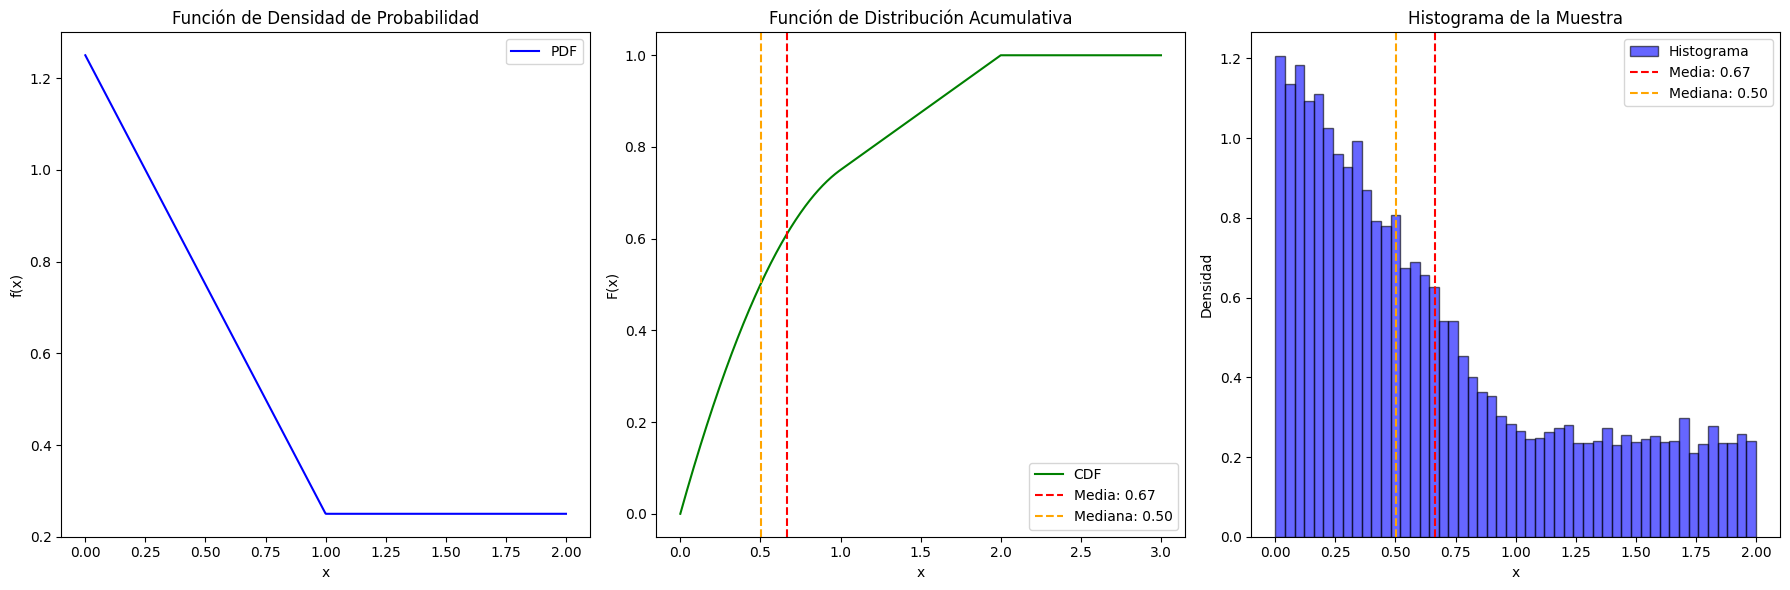

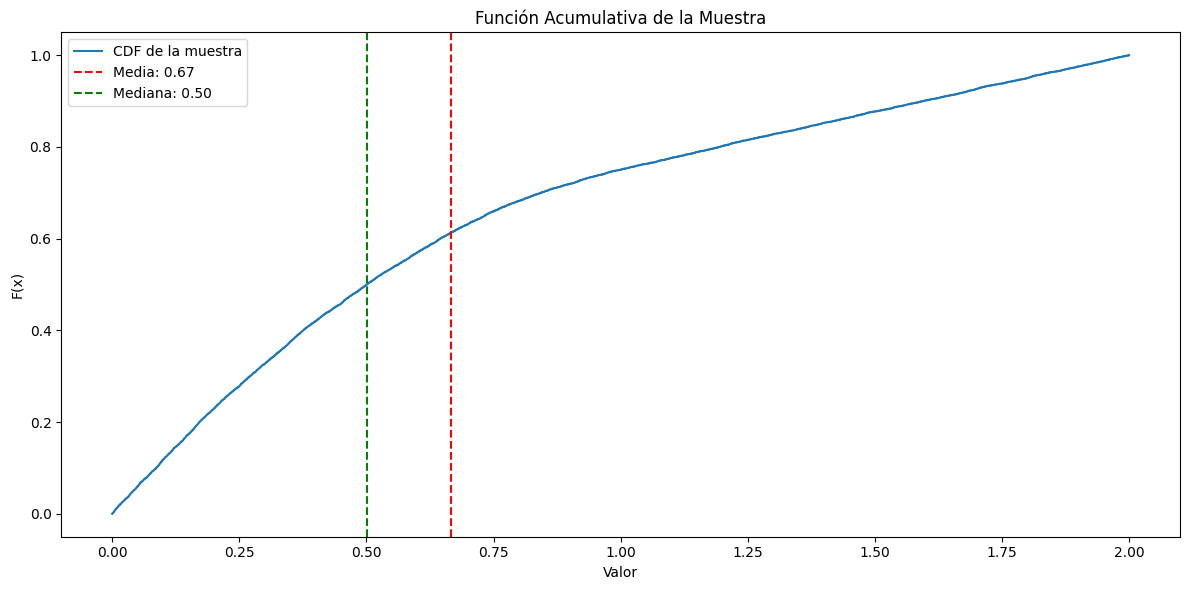

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import math

# Definir la función de densidad de probabilidad (PDF)
def funcion_a_trozos(x):
    if 0 <= x <= 1:
        return 5/4 - x
    else:
        return 1/4

# Definir la función de distribución acumulativa (CDF)
def funcion_acumulativa_a_trozos(x):
    if 0 <= x <= 1:
        return 5/4 * x - 1/2 * x**2
    elif 1 < x <= 2:
        return 1/4 * x + 1/2
    else:
        return 1

# Generar la muestra usando el método de la transformada inversa
def generar_muestra(n):
    muestra = []
    for _ in range(n):
        U = rnd.random()
        if 0 <= U <= 3/4:
            X = -((25/16) - 2*U)**(1/2) + (5/4)
        else:
            X = 4*U - 2
        muestra.append(X)
    return muestra

# Calcular la CDF a partir de la PDF
def compute_cdf(pdf, x_values):
    cdf = np.cumsum(pdf)
    cdf = cdf / cdf[-1]  # Normalizar para que la última entrada sea 1
    return cdf

# Generar la muestra
n = 10000
muestra = generar_muestra(n)

# Calcular la PDF y CDF en una malla de puntos
x_values_pdf = np.linspace(0, 2, 1000)
pdf_values = [funcion_a_trozos(x) for x in x_values_pdf]
x_values_cdf = np.linspace(0, 3, 1000)
cdf_values = [funcion_acumulativa_a_trozos(x) for x in x_values_cdf]

# Calcular media y mediana de la muestra
mean_sample = np.mean(muestra)
median_sample = np.median(muestra)

# Graficar la PDF
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.plot(x_values_pdf, pdf_values, label="PDF", color="blue")
plt.title("Función de Densidad de Probabilidad")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

# Graficar la CDF y añadir las líneas de media y mediana
plt.subplot(1, 3, 2)
plt.plot(x_values_cdf, cdf_values, label="CDF", color="green")
plt.axvline(mean_sample, color='red', linestyle='--', label=f'Media: {mean_sample:.2f}')
plt.axvline(median_sample, color='orange', linestyle='--', label=f'Mediana: {median_sample:.2f}')
plt.title("Función de Distribución Acumulativa")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.legend()

# Graficar el histograma de la muestra y añadir las líneas de media y mediana
plt.subplot(1, 3, 3)
plt.hist(muestra, bins=50, color="blue", edgecolor='black', density=True, alpha=0.6, label="Histograma")
plt.axvline(mean_sample, color='red', linestyle='--', label=f'Media: {mean_sample:.2f}')
plt.axvline(median_sample, color='orange', linestyle='--', label=f'Mediana: {median_sample:.2f}')
plt.title("Histograma de la Muestra")
plt.xlabel("x")
plt.ylabel("Densidad")
plt.legend()

# Ajustar el diseño y mostrar las gráficas
plt.tight_layout()
plt.show()

# Generar la función acumulativa de la muestra
def cdf(muestra):
    n = len(muestra)
    x = np.sort(muestra)
    y = np.arange(1, n+1) / n
    return x, y

X, Y = cdf(muestra)

# Graficar la función acumulativa de la muestra
plt.figure(figsize=(12, 6))
plt.step(X, Y, where='post', label='CDF de la muestra')
plt.axvline(mean_sample, color='red', linestyle='--', label=f'Media: {mean_sample:.2f}')
plt.axvline(median_sample, color='green', linestyle='--', label=f'Mediana: {median_sample:.2f}')
plt.title('Función Acumulativa de la Muestra')
plt.xlabel('Valor')
plt.ylabel('F(x)')
plt.legend()

# Ajustar el diseño y mostrar las gráficas
plt.tight_layout()
plt.show()
